# Klasterovanje podataka korišćenjem K-means algoritma

In [1]:
pip install pandas numpy sklearn matplotlib graphviz

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('credit_card_data.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Odabir kolona kojećemo razmatrati. (sve osim CUST_ID)

In [4]:
target_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

In [5]:
subframe = data[target_cols]

# Neodgovarajuce vrenosti vrednosti

NaN i Inf vrednosti nisu pogodne za rad algoritma. Prvo ćemo zameniti sve Inf vrednosti sa NaN a zatim prebrojati sve NaN vrednosti.

In [6]:
subframe = subframe.replace([np.inf, -np.inf], np.nan)
subframe.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Vidimo da set sadrži značajan broj NaN vrednosti, tako da bi izbacivanje redova bila previše oštra mera. Iz tog razloga ćemo NaN polja popuniti srednjom vrednošću. (tako nećemo napraviti veliku štetu)

In [7]:
subframe.fillna(subframe.mean(), inplace=True)

# Izbacivanje redudantnih obeležja

Pronalaženje i izbacivanje atributa u jakoj korelaciji.

In [8]:
subframe.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [9]:
CORR_CONST = 0.8
columns = subframe.corr().columns

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        if abs(subframe.corr()[columns[i]][columns[j]]) > CORR_CONST:
            print(columns[i], '<====>', columns[j])

PURCHASES <====> ONEOFF_PURCHASES
PURCHASES_FREQUENCY <====> PURCHASES_INSTALLMENTS_FREQUENCY


Uzimamo sva obeležja sem redudantnih. (ONEOFF_PURCHASES, PURCHASES_INSTALLMENTS_FREQUENCY)

In [10]:
target_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
subframe = subframe[target_cols]

# Standardizacija skupa podataka
Podaci se svode na uporedive intervale, da bi se povećala performansa algoritma.

In [11]:
frame_standard_deviation = subframe.std()
frame_mean = subframe.mean()
stan_df = (subframe - subframe.mean())/subframe.std()

In [12]:
stan_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731948,-0.249421,-0.424876,-0.349059,-0.466759,-0.806445,-0.678623,-0.675311,-0.476043,-0.511305,-0.960380,-0.528949,-3.109502e-01,-0.525522,0.360659
1,0.786917,0.134317,-0.469526,-0.454551,2.605459,-1.221690,-0.678623,0.573931,0.110068,-0.591763,0.688601,0.818596,8.930522e-02,0.234214,0.360659
2,0.447110,0.518055,-0.107662,-0.454551,-0.466759,1.269772,2.673302,-0.675311,-0.476043,-0.109014,0.826016,-0.383783,-1.016575e-01,-0.525522,0.360659
3,0.049096,-1.016896,0.232045,-0.454551,-0.368633,-1.014069,-0.399297,-0.258899,-0.329515,-0.551534,0.826016,-0.598655,2.292675e-15,-0.525522,0.360659
4,-0.358755,0.518055,-0.462037,-0.454551,-0.466759,-1.014069,-0.399297,-0.675311,-0.476043,-0.551534,-0.905414,-0.364347,-2.657764e-01,-0.525522,0.360659


# Vizualizacija podataka

Pokušaj vizualizacije korišćenjem PCA.

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
X = stan_df
X.head()
principalComponents = pca.fit_transform(X)

In [15]:
xcords = principalComponents[:,0]
ycords = principalComponents[:,1]

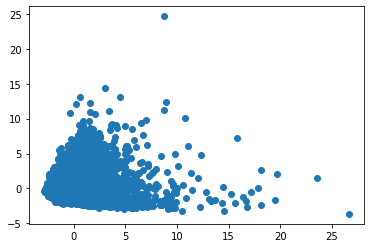

In [16]:
plt.scatter(xcords, ycords)
plt.show()

Pokušaćemo tSNE, da dobijemo bolju podelu podataka u prostoru.

In [17]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

In [18]:
xcords = X_embedded[:,0]
ycords = X_embedded[:,1]

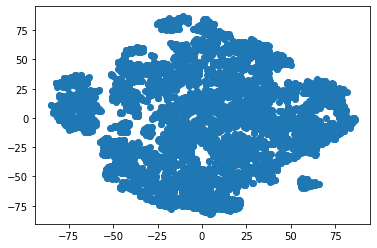

In [19]:
plt.scatter(xcords, ycords)
plt.show()

# Implementacija K-means i Cluster

In [20]:
class Cluster(object):

    def __init__(self, center):
        self.center = center
        self.data = []

    def recalculate_center(self):
        # racunanje centra klastera
        if len(self.data) > 0:
            t = self.center
            self.center = np.average(self.data, axis=0)
            return np.linalg.norm(t - self.center)
        return 0
            
class KMeans(object):

    def __init__(self, n_clusters, max_iter):
        """
        :param n_clusters: broj grupa (klastera)
        :param max_iter: maksimalan broj iteracija algoritma
        :return: None
        """
        self.data = None
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.clusters = []

    def fit(self, data):
        self.data = data  # lista N-dimenzionalnih podataka
        
        # TODO 4: normalizovati podatke pre primene k-means

        data_dim = self.data.shape[1]
        
        # inicijalizacija nesumicnih centara
        for centar in range(self.n_clusters):
            cent = np.random.uniform(-1, 1, (1, data_dim))[0]
            self.clusters.append(Cluster(cent))
            
        for itr in range(self.max_iter):
            # ciscenje dodeljenih tacaka pred iteraciju
            for c in self.clusters:
                c.data = []

            # za svaki element proveravam kome pripada
            for row in self.data:
                cluster_index = self.predict(row)
                self.clusters[cluster_index].data.append(row)
            # pomeranje centara
            change = False
            for cluster in self.clusters:
                if cluster.recalculate_center() > 10**(-7):
                    change = True
            
            if change:
                break

    def predict(self, row):
        closest_index = 0
        for i in range(len(self.clusters)):
            if np.linalg.norm(row - self.clusters[closest_index].center) > np.linalg.norm(row - self.clusters[i].center):
                closest_index = i

        return closest_index

    def sum_squared_error(self):
        total = 0

        for clus in self.clusters:
            for point in clus.data:
                # kvadrat rastojanja
                total += np.linalg.norm(clus.center - point)**2

        return total

# Pronalaženje optimalnog broja klastera

In [21]:
prep_data = stan_df.to_numpy()

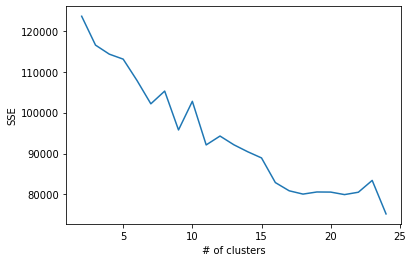

In [22]:
plt.figure()
sum_squared_errors = []
val_range = range(2, 25)
for n_clusters in val_range:
    kmeans = KMeans(n_clusters=n_clusters, max_iter=200)
    kmeans.fit(prep_data)
    sse = kmeans.sum_squared_error()
    sum_squared_errors.append(sse)

plt.plot(val_range, sum_squared_errors)
plt.xlabel('# of clusters')
plt.ylabel('SSE')
plt.show()

Uočavamo lakat na 10, tako da ćemo 10 koristiti kao optimalni broj klastera.

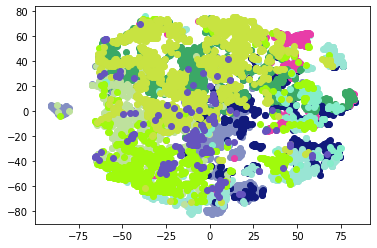

In [23]:
kmeans = KMeans(n_clusters=10, max_iter=100)
kmeans.fit(prep_data)

# podaci iz svih klastera
data_concat = []

# broj klastera
cluster_number = 1

# (int) anotacije koje ce biti pridruzene svakom klijentu
data_cluster_predictions = []

# generisana imena klastera
cluster_names = []

for c in kmeans.clusters:
    data_concat += c.data
    data_cluster_predictions += [cluster_number] * len(c.data)
    cluster_names.append('Klasa_' + str(cluster_number))
    cluster_number += 1

DATA_embedded = TSNE(n_components=2,).fit_transform(data_concat)
dex = 0
for c in kmeans.clusters:
    cluster_color = np.random.rand(3,)
    for i in range(len(c.data)):
        xcord = DATA_embedded[dex,0]
        ycord = DATA_embedded[dex,1]
        plt.scatter(xcord, ycord, c=[cluster_color])
        dex += 1
plt.show()

Niz **data_cluster_predictions** sadrži numeričke oznake koje redom odgovaraju podacima iz **data_concat**. Zato ovde rekonstruišemo dataframe iz **data_concat**, da bi zadržali redosled. Takođe, vraćamo podatke u originalnu formu.

In [24]:
dataframe = pd.DataFrame.from_records(data_concat)
dataframe.columns = target_cols
dataframe = dataframe * frame_standard_deviation + frame_mean
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1014.926473,1.0,861.49,200.00,0.00000,3.333330e-01,0.083333,0.000000,0.0,5.0,7000.0,688.278568,311.963409,0.0,12.0
1,2772.772734,1.0,0.00,0.00,346.81139,-5.551115e-17,0.000000,0.083333,1.0,0.0,3000.0,805.647974,989.962866,0.0,12.0
2,3577.970933,1.0,398.64,398.64,0.00000,1.000000e+00,0.000000,0.000000,0.0,12.0,4000.0,1053.980464,12465.549380,0.0,12.0
3,2016.684686,1.0,176.68,176.68,0.00000,6.666670e-01,0.000000,0.000000,0.0,8.0,2000.0,223.068600,13557.297260,0.0,12.0
4,22.063490,1.0,100.00,100.00,0.00000,4.166670e-01,0.000000,0.000000,0.0,5.0,6900.0,160.767773,159.684442,0.0,12.0


# Treniranje stabla odlučivanja
Podelićemo skup podataka na trening-test. Zatim ćemo izvršiti treniranje stable odlučivanja da bi na osnovu njega 
izvukli određene zaključke o našim klasterima.

In [25]:
msk = np.random.rand(len(dataframe)) < 0.8

train = dataframe[msk]
train_y = np.array(data_cluster_predictions)[msk]

In [26]:
test = dataframe[~msk]
test_y = np.array(data_cluster_predictions)[~msk]

In [27]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier(max_depth=8)

clf = dtree.fit(train, train_y)

In [28]:
from sklearn.metrics import accuracy_score

predicted = clf.predict(test)
acc = accuracy_score(test_y, predicted)
acc

0.7240085744908896

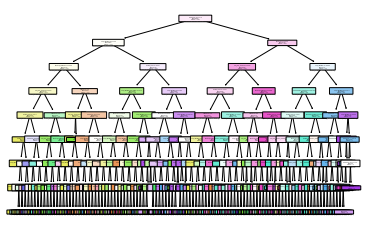

In [29]:
tree.plot_tree(clf, feature_names=target_cols, filled=True, rounded=True)
tree.export_graphviz(clf, feature_names=target_cols, out_file='output.dot', class_names=cluster_names, filled=True, rounded=True)
# display(graph)

# Analiza klastera

Kako se stablo gore ne vidi najbolje, generisan je *dot* fajl pomoću kog je moguće izgenerisati sliku (koju možemo zumirati).
Priložena izgenerisana slika, na osnovu koje je data analiza koja sledi.

Podaci su grupisani u 10 klastera (numerisanih od 1 do 10). Svaki element je pridodat klasi na osnovu klastera kom pripada.

In [32]:
dataframe.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,411.067645,978.871112,4.903505e-01,0.202458,0.135144,3.248827,14.709832,4494.449450,1.733144e+03,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,904.338115,2097.163877,4.013707e-01,0.298336,0.200121,6.824647,24.857649,3638.612411,2.895064e+03,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.551115e-17,0.000000,0.000000,0.000000,0.000000,50.000000,2.273737e-13,0.019163,0.000000,6.000000
25%,128.281916,0.888889,39.635000,0.000000,0.000000,8.333300e-02,0.000000,0.000000,0.000000,1.000000,1600.000000,3.832762e+02,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,89.000000,0.000000,5.000000e-01,0.083333,0.000000,0.000000,7.000000,3000.000000,8.569015e+02,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,468.637500,1113.821139,9.166670e-01,0.300000,0.222222,4.000000,17.000000,6500.000000,1.901134e+03,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,22500.000000,47137.211760,1.000000e+00,1.000000,1.500000,123.000000,358.000000,30000.000000,5.072148e+04,76406.207520,1.000000,12.000000


## Zapažanja

Klasa 1: Jako retko vrše kupovinu (*purchases_frequency* <= 0.042) i imaju mali limit (*credit_limit* <= 1650) na kreditnoj kartici.

Klasa 2: Troše ispod proseka u kupovinama na rate (*installments_purchases* <= 347) i jako retko plaćaju unapred (*cash_advance_frequency* <= 0.155).

Klasa 3: Mali limit na kartici (*credit_limit* <= 2475.0), vrše kupovinu unapred više od proseka (*.

Klasa 4: Troše veće sume u kupovinama na rate (*installments_purchases* > 4.935), balans na kartici im se značajno manje menja u odnosu na ostale klijente (*balance_frequency* <= 0.682, dok je prosek 0.87).

Klasa 5: Vrše kupovine iznad proseka (*purchases_frequency* > 0.625), poseduju više novca (*balance* > 1694.765) od proseka.

Klasa 6: Limit na kreditnoj kartici blizu proseka, troše više novca (od većine) na kupovinu.

Klasa 7: Troše ispod proseka na kupovinu (*purchases* < 962.09), iako im je limit na kartici značajno iznad (*credit_limit* > 6100.0).

Klasa 8: Značajan broj transakcija unapred (*cash_advance_trx* > 8.5), retko kupuju (*purchases_frequency* <= 0.146).

Klasa 9: Veliki limit na kartici (*credit_limit* > 10250.0) i vrlo često im se menja stanje na računu (*balance_frequency* > 0.894).

Klasa 10: Veoma često se menja balans na računu (*balance_frequency* > 0.955).